In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "mouse_drug_data.csv"
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_data_to_load = "clinicaltrial_data.csv"
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

combined = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
groupByDrugTimepoint = combined.groupby(["Drug", "Timepoint"])
tumorvolume = pd.DataFrame(groupByDrugTimepoint['Tumor Volume (mm3)'].mean())
tumorvolume.reset_index(inplace = True);
tumorvolume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
stderrTumor = pd.DataFrame(groupByDrugTimepoint['Tumor Volume (mm3)'].sem())
#stderrTumor['Tumor Volume (mm3)'] = groupByDrugTimepoint['Tumor Volume (mm3)'].agg(np.std) / np.sqrt(stderrTumor['Tumor Volume (mm3)'])
stderrTumor.reset_index(inplace = True);
stderrTumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
druglist = tumorvolume['Drug'].unique()
timepointlist = tumorvolume['Timepoint'].unique()

stderrTumor_reformatted = pd.DataFrame({'Timepoint':timepointlist})
for drug in druglist:
    temporary = stderrTumor.loc[stderrTumor['Drug'] ==  drug,['Timepoint',"Tumor Volume (mm3)"]]
    stderrTumor_reformatted = pd.merge(stderrTumor_reformatted, temporary, on="Timepoint", how="left")
    stderrTumor_reformatted = stderrTumor_reformatted.rename(columns={"Tumor Volume (mm3)":drug})
stderrTumor_reformatted = stderrTumor_reformatted.set_index("Timepoint")

tumorvolume_reformatted = pd.DataFrame({'Timepoint':timepointlist})
for drug in druglist:
    temporary = tumorvolume.loc[tumorvolume['Drug'] ==  drug,['Timepoint',"Tumor Volume (mm3)"]]
    tumorvolume_reformatted = pd.merge(tumorvolume_reformatted, temporary, on="Timepoint", how="left")
    tumorvolume_reformatted = tumorvolume_reformatted.rename(columns={"Tumor Volume (mm3)":drug})
tumorvolume_reformatted = tumorvolume_reformatted.set_index("Timepoint")
tumorvolume_reformatted

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


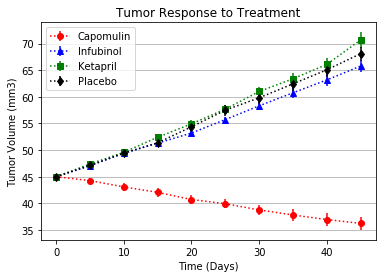

In [6]:
selected_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
fmtstr = ['ro:','b^:','gs:','kd:']
xx = tumorvolume_reformatted.index.tolist()

for i in range(len(selected_drugs)):
    yy = tumorvolume_reformatted[selected_drugs[i]].tolist()
    error = stderrTumor_reformatted[selected_drugs[i]].tolist()
    plt.errorbar(xx,yy,yerr=error,fmt = fmtstr[i],label = selected_drugs[i])

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#plt.grid(which='major', axis='both', linestyle='--')
plt.grid(which='major', axis='y', linestyle='-')
plt.legend(loc="upper left")

plt.savefig("treatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
metastaticsites = pd.DataFrame(groupByDrugTimepoint['Metastatic Sites'].mean())
metastaticsites.reset_index(inplace = True);
metastaticsites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
stderrmeta = pd.DataFrame(groupByDrugTimepoint['Metastatic Sites'].sem())
#stderrmeta['Metastatic Sites'] = groupByDrugTimepoint['Metastatic Sites'].agg(np.std) / np.sqrt(stderrmeta['Metastatic Sites'])
stderrmeta.reset_index(inplace = True);
stderrmeta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
stderrmeta_reformatted = pd.DataFrame({'Timepoint':timepointlist})
for drug in druglist:
    temporary = stderrmeta.loc[stderrmeta['Drug'] ==  drug,['Timepoint',"Metastatic Sites"]]
    stderrmeta_reformatted = pd.merge(stderrmeta_reformatted, temporary, on="Timepoint", how="left")
    stderrmeta_reformatted = stderrmeta_reformatted.rename(columns={"Metastatic Sites":drug})
    
stderrmeta_reformatted = stderrmeta_reformatted.set_index("Timepoint")

metastaticsites_reformatted = pd.DataFrame({'Timepoint':timepointlist})
for drug in druglist:
    temporary = metastaticsites.loc[metastaticsites['Drug'] ==  drug,['Timepoint',"Metastatic Sites"]]
    metastaticsites_reformatted = pd.merge(metastaticsites_reformatted, temporary, on="Timepoint", how="left")
    metastaticsites_reformatted = metastaticsites_reformatted.rename(columns={"Metastatic Sites":drug})
    
metastaticsites_reformatted = metastaticsites_reformatted.set_index("Timepoint")
metastaticsites_reformatted.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


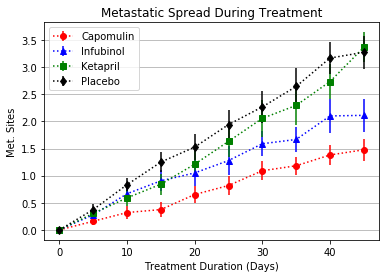

In [10]:
for i in range(len(selected_drugs)):
    yy = metastaticsites_reformatted[selected_drugs[i]].tolist()
    error = stderrmeta_reformatted[selected_drugs[i]].tolist()
    plt.errorbar(xx,yy,yerr=error,fmt = fmtstr[i],label = selected_drugs[i])

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.grid(which='major', axis='y', linestyle='-')
plt.legend(loc="upper left")

plt.savefig("spread.png")
plt.show()

## Survival Rates

In [11]:
mousecount = pd.DataFrame(groupByDrugTimepoint['Tumor Volume (mm3)'].count())
mousecount = mousecount.rename(columns={"Tumor Volume (mm3)":"Mouse Count"})
mousecount.reset_index(inplace = True);
mousecount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
mousecount_reformatted = pd.DataFrame({'Timepoint':timepointlist})

for drug in druglist:
    temporary = mousecount.loc[mousecount['Drug'] ==  drug,['Timepoint',"Mouse Count"]]
    mousecount_reformatted = pd.merge(mousecount_reformatted, temporary, on="Timepoint", how="left")
    mousecount_reformatted = mousecount_reformatted.rename(columns={"Mouse Count":drug})
    
mousecount_reformatted = mousecount_reformatted.set_index("Timepoint")
mousecount_reformatted.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


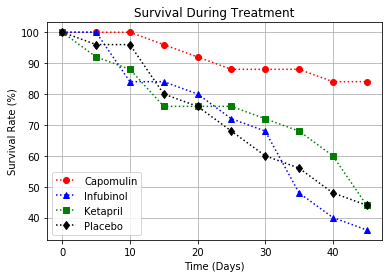

In [13]:
for i in range(len(selected_drugs)):
    yy = mousecount_reformatted[selected_drugs[i]].tolist()
    survivalrate = [(100 * y / yy[0]) for y in yy]
    plt.plot(xx,survivalrate,fmtstr[i],label = selected_drugs[i])

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid()
plt.legend(loc="lower left")

plt.savefig("survival.png")
plt.show()

## Summary Bar Graph

In [14]:
percentchangeSeries = []
for drug in druglist:
    initial = tumorvolume_reformatted.loc[timepointlist[0],drug]
    final = tumorvolume_reformatted.loc[timepointlist[len(timepointlist)-1],drug]
    percentchangeSeries.append(100.0 * (final - initial) / initial)
percentchange = pd.DataFrame({'Drug':druglist,'Percent Change':percentchangeSeries})
percentchange = percentchange.set_index("Drug")
percentchange

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


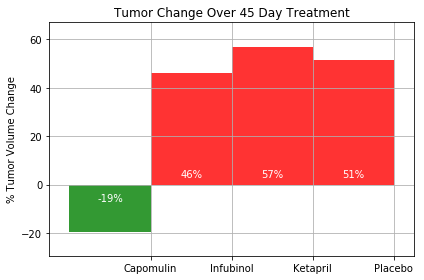

In [15]:
x_axis = np.arange(len(selected_drugs))
yy = [percentchange.loc[drug,'Percent Change'] for drug in selected_drugs]

fig, ax = plt.subplots()

rects = []
for i in range(len(x_axis)):
    if yy[i] < 0.0:
        colorstr = 'g'
    else: 
        colorstr = 'r'
    rects.append(ax.bar(x_axis[i],yy[i], color=colorstr,width = 1, alpha=0.8, align="center"))

xticklocations = [(value + 0.5) for value in x_axis]
ax.set_xticks(xticklocations)
ax.set_xticklabels(selected_drugs)
yticklocations = [i*20 - 100 for i in range(11)]
ax.set_yticks(yticklocations)

ax.set_xlim(-0.75, len(x_axis)-0.25)
ax.set_ylim(min(yy) - 10, max(yy) + 10)

ax.grid()
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
    
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height < 0.0:
            label_yloc = -7
        else:
            label_yloc = 3
        ax.annotate(f"{int(height)}%",xy=(rect.get_x() + rect.get_width() / 2, label_yloc),ha='center',color='white')

for i in x_axis:
    autolabel(rects[i])
    
fig.tight_layout()
plt.savefig("change.png")
plt.show()

# Observations
1. Out of four drugs, only Capomulin helps to reduce tumor volume.
2. Capomulin also results in highest survival rate.
3. Metastatic spread is lowest for the case of highest survival rate.